In [2]:
##
##  Project:  Analyze last course experience before student drops math major
##

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Data import:  students who dropped the major.
df = pd.read_csv("program_drops.csv")
df = df.loc[df["Dropped plan #"].isin([8500, 67400])]  # 1st major
#df = df.loc[df["Dropped plan #"] == 8500]  #1st major, BS
#df.loc[df["Dropped plan #"] == 67400]  #1st major, BA
#df.loc[df["Dropped plan #"] == 67100]  #2nd major
df["Course"] = df["Course"].str[4:]
# Make Course numeric; remove "experimental" designation
df.Course = df.Course.str.replace(r'...E', lambda a : a.group(0)[:-1])
# df.Course.replace("199E", "199", inplace=True)
df = df.groupby("Course").sum()

# Data import:  student data for math majors overall.
totals = pd.read_csv("grade_distribution.csv")
totals["Total"] = totals.Female + totals.Male
totals["Course"] = totals["Course"].str[4:]
# Make Course numeric; remove "experimental" designation
totals.Course = totals.Course.str.replace(r'...[A-E]', lambda a : a.group(0)[:-1])
ddf = totals.groupby("Course").sum()
#ddf = ddf.reset_index()

# Perform join
#df = df.set_index("Course")
#ddf = ddf.set_index("Course")
COURSES = df.join(ddf, how="inner", rsuffix='_t')  # suffix to disambiguate duplicate column names
COURSES["Course"] = COURSES.index

#  Roll up grade distribution summary, all students
COURSES["A_a"] = COURSES["A_t"]+COURSES["A-"]
COURSES["B_a"] = COURSES["B+"]+COURSES["B_t"]+COURSES["B-"]
COURSES["C_a"] = COURSES["C+"]+COURSES["C_t"]+COURSES["C-"]
COURSES["D_a"] = COURSES["D+"]+COURSES["D_t"]+COURSES["D-"]
COURSES["F_a"] = COURSES["F_t"]
COURSES["W_a"] = COURSES["IP"]+COURSES["I"]+COURSES["NP"]+COURSES["WP"]+COURSES["W_t"]+COURSES["WF"]

COURSES

# # Reset indices
# df = df.reset_index(drop=True)
# ddf = ddf.reset_index(drop=True)


,Dropped plan #,A,B,C,D,F,W,Females,Males,Total,...,Female,Male,Total_t,Course,A_a,B_a,C_a,D_a,F_a,W_a
Course,,,,,,,,,,,,,,,,,,,,,
227,8500,0,0,1,0,0,0,0,1,1,...,44,252,296,227,41,65,110,22,22,36
231,75900,7,8,10,1,1,0,23,4,27,...,1208,1498,2706,231,490,816,744,262,211,183
232,75900,4,5,5,1,0,0,13,2,15,...,644,832,1476,232,285,462,416,138,77,98
233,8500,1,0,0,0,1,0,2,0,2,...,358,140,498,233,71,134,152,72,40,29
234,8500,0,0,1,0,0,0,1,0,1,...,201,82,283,234,39,93,78,51,14,8
235,75900,11,14,9,3,0,2,21,18,39,...,847,1461,2308,235,504,669,591,188,148,208
236,75900,8,16,18,6,2,0,25,25,50,...,523,1103,1626,236,282,482,456,163,120,123
237,75900,9,7,11,3,4,1,20,15,35,...,395,885,1280,237,279,429,353,87,66,66
238,75900,2,7,6,4,2,0,9,12,21,...,223,660,883,238,165,308,242,61,43,64


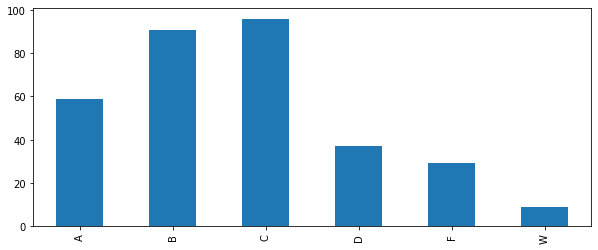

W rate:  0.028037383177570093
Mean GPA:  2.3653846153846154


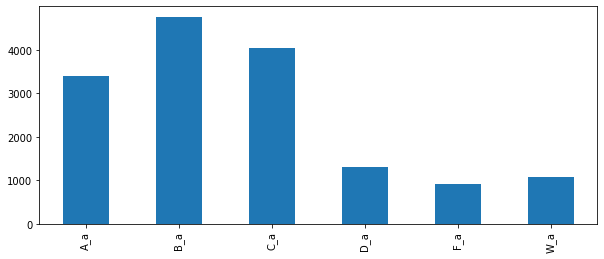

W rate:  0.07002385711522342
Mean GPA:  2.5809470983845246


In [3]:
#
#  Exploratory / descriptive plots
#

import seaborn as sns

#  Grade distribution summary, those who drop
COURSES.loc[:,['A','B','C','D','F','W']].sum().plot.bar(figsize=(10,4))
plt.show()

ddist = COURSES.loc[:,['A','B','C','D','F','W']].sum()
print("W rate: ", ddist[-1]/sum(ddist))
print("Mean GPA: ", sum([ddist[i]*(4-i) for i in range(0,4+1)])/sum(ddist[:-1]))

COURSES.loc[:,['A_a','B_a','C_a','D_a','F_a','W_a']].sum().plot.bar(figsize=(10,4))
plt.show()

adist = COURSES.loc[:,['A_a','B_a','C_a','D_a','F_a','W_a']].sum()
print("W rate: ", adist[-1]/sum(adist))
print("Mean GPA: ", sum([adist[i]*(4-i) for i in range(0,4+1)])/sum(adist[:-1]))



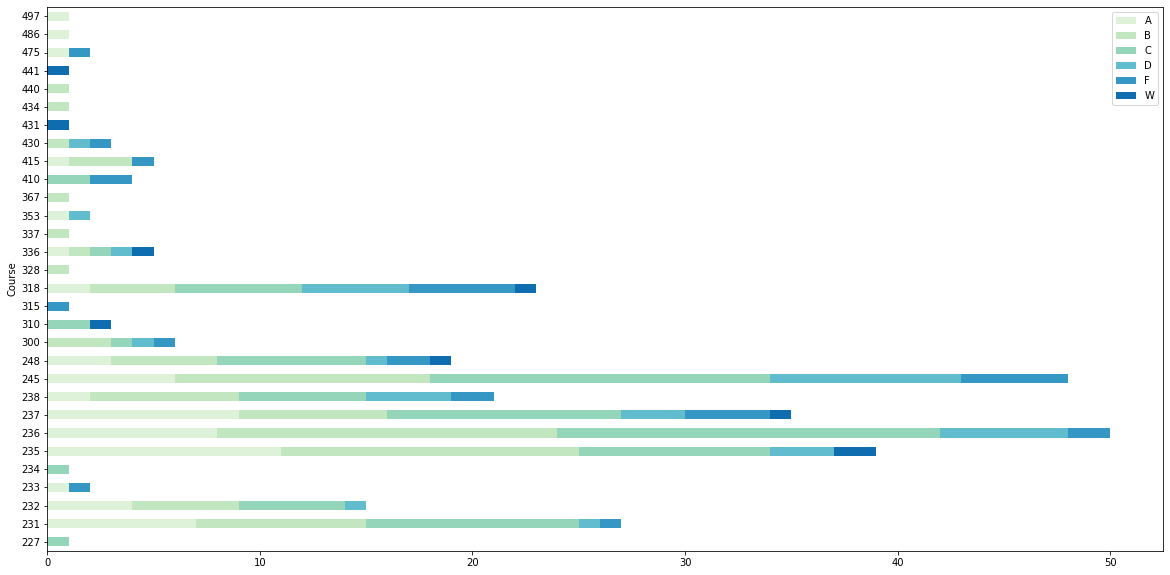

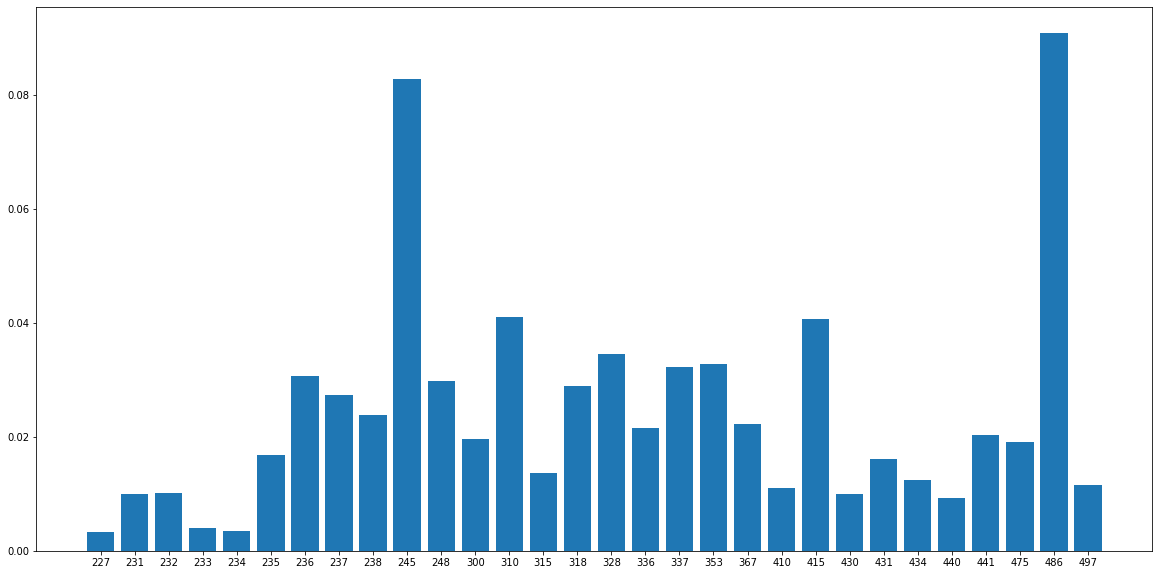

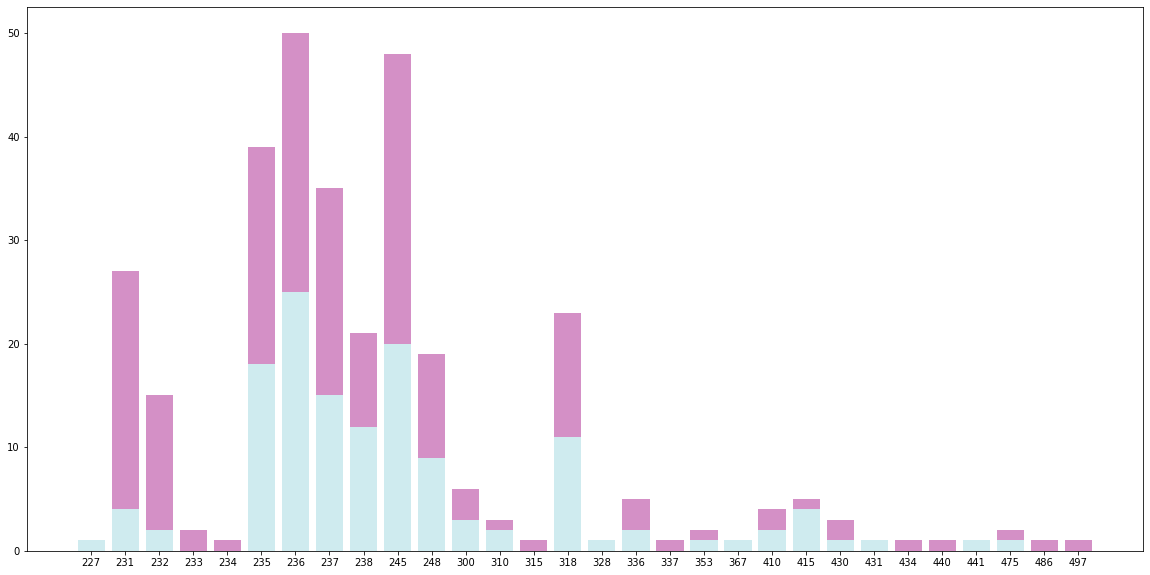

In [199]:
#
#  Exploratory / descriptive plots
#

#  Grade distributions by course
COURSES.loc[:,['A','B','C','D','F','W']].plot.barh(stacked=True, color=sns.color_palette("GnBu"), figsize=(20,10))
plt.show()

#  Drop _percentage_ by course
plt.figure(figsize=(20,10))
plt.bar(COURSES.Course, COURSES.Total/COURSES.Total_t)
plt.show()

#  Gender stacked chart, absolute counts
plt.figure(figsize=(20,10))
#plt.bar(COURSES.Course, COURSES.Males, color="#9b59b6")
#plt.bar(COURSES.Course, COURSES.Females, bottom=COURSES.Males, color="#34495e")
plt.bar(COURSES.Course, COURSES.Males, color=sns.color_palette("cubehelix", 8)[-1])
plt.bar(COURSES.Course, COURSES.Females, bottom=COURSES.Males, color=sns.color_palette("cubehelix", 8)[-3])
plt.show()



In [5]:
#
#  De-aggregate data to create "observations" suitable for ML
#

# create temporary copy of COURSES
# as we will exploit numeric indexing using iloc...
tCOURSES = COURSES.reset_index(drop=True)

print("De-aggregating COURSES...  (takes a few seconds)")

dropped = pd.DataFrame(None)  # students who dropped the major  (rare event)
student = pd.DataFrame(None)  # typical student from overall population  (common event)

for row in tCOURSES.index:
    ## Create records for students who dropped based on grades
    for t in range(tCOURSES.iloc[row].A):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 4] ])
        dropped = pd.concat([dropped, new_df])
    for t in range(tCOURSES.iloc[row].B):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 3] ])
        dropped = pd.concat([dropped, new_df])
    for t in range(tCOURSES.iloc[row].C):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 2] ])
        dropped = pd.concat([dropped, new_df])
    for t in range(tCOURSES.iloc[row].D):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 1] ])
        dropped = pd.concat([dropped, new_df])
    for t in range(tCOURSES.iloc[row].F):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 0] ])
        dropped = pd.concat([dropped, new_df])
    for t in range(tCOURSES.iloc[row].W):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, -1] ])
        dropped = pd.concat([dropped, new_df])
    ## Create records for typical students based on grade distribution
    for t in range(tCOURSES.iloc[row]["A_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 4] ])
        student = pd.concat([student, new_df])
    for t in range(tCOURSES.iloc[row]["B_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 3] ])
        student = pd.concat([student, new_df])
    for t in range(tCOURSES.iloc[row]["C_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 2] ])
        student = pd.concat([student, new_df])
    for t in range(tCOURSES.iloc[row]["D_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 1] ])
        student = pd.concat([student, new_df])
    for t in range(tCOURSES.iloc[row]["F_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, 0] ])
        student = pd.concat([student, new_df])
    for t in range(tCOURSES.iloc[row]["W_a"]):
        new_df = pd.DataFrame([ [tCOURSES.iloc[row].Course, -1] ])
        student = pd.concat([student, new_df])

dropped = dropped.reset_index(drop=True)
student = student.reset_index(drop=True)

print(dropped)
print(student)


De-aggregating COURSES...  (takes a few seconds)
       0  1
0    227  2
1    231  4
2    231  4
3    231  4
4    231  4
..   ... ..
316  441 -1
317  475  4
318  475  0
319  486  4
320  497  4

[321 rows x 2 columns]
         0  1
0      227  4
1      227  4
2      227  4
3      227  4
4      227  4
...    ... ..
15504  497  4
15505  497  4
15506  497  4
15507  497  3
15508  497 -1

[15509 rows x 2 columns]


In [6]:
#
#  De-aggregate:  assign gender
#
dropped_counter = 0
student_counter = 0
dropped.columns = ["Course", "Grade"]
student.columns = ["Course", "Grade"]
dropped["Gender"] = -1
dropped["DROP"] = 1
student["Gender"] = -1
student["DROP"] = 0

print("De-aggregating COURSES, assigning gender...  (takes a few seconds)")

for row in tCOURSES.index:
    Male_ind = np.random.choice(tCOURSES.iloc[row].Total, tCOURSES.iloc[row].Males, replace=False)
    Female_ind = [ i for i in range(tCOURSES.iloc[row].Total) if i not in Male_ind ]
    for t in Male_ind:
        dropped.iloc[ dropped_counter+t, 2 ] = 0
    for t in Female_ind:
        dropped.iloc[ dropped_counter+t, 2 ] = 1
    dropped_counter = dropped_counter + tCOURSES.iloc[row].Total

    Male_ind = np.random.choice(tCOURSES.iloc[row].Total_t, tCOURSES.iloc[row].Male, replace=False)
    Female_ind = [ i for i in range(tCOURSES.iloc[row].Total_t) if i not in Male_ind ]
    for t in Male_ind:
        student.iloc[ student_counter+t, 2 ] = 0
    for t in Female_ind:
        student.iloc[ student_counter+t, 2 ] = 1
    student_counter = student_counter + tCOURSES.iloc[row].Total_t

    print ("..", tCOURSES.iloc[row].Course, dropped_counter, student_counter)

del tCOURSES
print(dropped)
print(student)

De-aggregating COURSES, assigning gender...  (takes a few seconds)
.. 227 1 296
.. 231 28 3002
.. 232 43 4478
.. 233 45 4976
.. 234 46 5259
.. 235 85 7567
.. 236 135 9193
.. 237 170 10473
.. 238 191 11356
.. 245 239 11935
.. 248 258 12571
.. 300 264 12878
.. 310 267 12951
.. 315 268 13024
.. 318 291 13821
.. 328 292 13850
.. 336 297 14081
.. 337 298 14112
.. 353 300 14173
.. 367 301 14218
.. 410 305 14581
.. 415 310 14704
.. 430 313 15007
.. 431 314 15069
.. 434 315 15149
.. 440 316 15257
.. 441 317 15306
.. 475 319 15411
.. 486 320 15422
.. 497 321 15509
    Course  Grade  Gender  DROP
0      227      2       0     1
1      231      4       1     1
2      231      4       1     1
3      231      4       1     1
4      231      4       1     1
..     ...    ...     ...   ...
316    441     -1       0     1
317    475      4       1     1
318    475      0       0     1
319    486      4       1     1
320    497      4       1     1

[321 rows x 4 columns]
      Course  Grade  Gender  D

In [7]:
#
#  De-aggregate data to create "observations" suitable for ML
#
#  "Upsample" the rare class using bootstrapping to create a balanced data set.
#

from sklearn.utils import resample

N_dropped = len(dropped.index)
N_student = len(student.index)
windows = np.floor(N_student/N_dropped).astype(int)

STUDENTS = pd.DataFrame(None)
## upsample e.g. 321 rows to 321*48 = 15408 rows
for _ in range(windows):
    new_df = resample(dropped, replace=True, n_samples=N_dropped)
    STUDENTS = pd.concat([STUDENTS, new_df])

## downsample e.g. 15509 rows to the 15408 rows
STUDENTS = pd.concat([STUDENTS, student.sample(n=(N_dropped * windows))])

## use one-hot encoding for course category
STUDENTS = pd.concat([STUDENTS, pd.get_dummies(STUDENTS.Course)], axis=1)

## Consider dropping the negative grades?
#STUDENTS = STUDENTS.loc[STUDENTS.Grade > 0]

STUDENTS = STUDENTS.reset_index(drop=True)
print(STUDENTS)

## Build the model
cols = ['Course', 'Grade', 'Gender', '227', '231', '232', '233', '234',
       '235', '236', '237', '238', '245', '248', '300', '310', '315', '318',
       '328', '336', '337', '353', '367', '410', '415', '430', '431', '434',
       '440', '441', '475', '486', '497']
X = STUDENTS[cols]
y = STUDENTS['DROP']

## Establish metrics
##   pass in arrays or lists; use .values for pandas Series
def score(predicted, actual):
    #df = pd.concat([predicted,actual], axis=1)    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for row in range(len(predicted)):
        pre = predicted[row]
        act = actual[row]
        if pre == 1 and act == 1:
            TP += 1
        if pre == 1 and act == 0:
            FP += 1
        if pre == 0 and act == 1:
            FN += 1
        if pre == 0 and act == 0:
            TN += 1
    T = sum([TP,TN,FP,FN])
    print ("accuracy: ", (TP+TN)/T, " false negative: ", FN/T)
    print("  [TP, TN, FP, FN] T = ", [TP,TN,FP,FN], T)        
    #return [TP,TN,FP,FN]
    return (TP+TN)/T  #FN/T

      Course  Grade  Gender  DROP  227  231  232  233  234  235  ...  410  \
0        245      4       1     1    0    0    0    0    0    0  ...    0   
1        300      0       1     1    0    0    0    0    0    0  ...    0   
2        236      4       0     1    0    0    0    0    0    0  ...    0   
3        235      4       1     1    0    0    0    0    0    1  ...    0   
4        236      2       0     1    0    0    0    0    0    0  ...    0   
...      ...    ...     ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
30811    248      0       0     0    0    0    0    0    0    0  ...    0   
30812    367      4       0     0    0    0    0    0    0    0  ...    0   
30813    497      4       0     0    0    0    0    0    0    0  ...    0   
30814    237      2       1     0    0    0    0    0    0    0  ...    0   
30815    430      2       1     0    0    0    0    0    0    0  ...    0   

       415  430  431  434  440  441  475  486  497  
0        0    0    0  

In [8]:
#
#  ML Model I:  Logistic regression
#

from sklearn.model_selection import train_test_split 
import statsmodels.api as sm

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

logit_model=sm.Logit(y_train.astype(float),X_train.astype(float))
result=logit_model.fit()
#print(result.summary2())
predictions = np.around(result.predict(X_test.astype(float)))

print()
score(predictions.values, y_test.values)

Optimization terminated successfully.
         Current function value: 0.621932
         Iterations 6

accuracy:  0.6416147455867082  false negative:  0.20580218068535824
  [TP, TN, FP, FN] T =  [4499, 5387, 2351, 3171] 15408


0.6416147455867082


accuracy:  0.7112538940809969  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4922, 2803, 1646] 15408

accuracy:  0.7115784008307373  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4927, 2798, 1646] 15408

accuracy:  0.7115784008307373  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4927, 2798, 1646] 15408

accuracy:  0.7116433021806854  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4928, 2797, 1646] 15408

accuracy:  0.7115784008307373  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4927, 2798, 1646] 15408

accuracy:  0.7115784008307373  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4927, 2798, 1646] 15408

accuracy:  0.7115134994807892  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4926, 2799, 1646] 15408

accuracy:  0.7115134994807892  false negative:  0.1068276220145379
  [TP, TN, FP, FN] T =  [6037, 4926, 2799, 1646] 15408

accuracy:  0.71

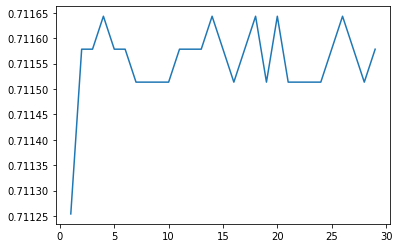

In [10]:
#
#  ML Model II:  Random Forest
#

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

HPT = []
for N_EST in range(1,30):
	#rf_model = RandomForestClassifier(n_estimators = N_EST, random_state = 42)
	rf_model = RandomForestClassifier(n_estimators = N_EST, bootstrap = False) ## TODO: investigate.
	# Train the model on training data
	rf_model = rf_model.fit(X_train, y_train)
	predictions = rf_model.predict(X_test)

	print()
	HPT.append([N_EST, score(predictions, y_test.values)])
plt.plot(pd.DataFrame(HPT)[0],pd.DataFrame(HPT)[1])


accuracy:  0.6541407061266874  false negative:  0.12227414330218069
  [TP, TN, FP, FN] T =  [5801, 4278, 3445, 1884] 15408

Variable: Course               Importance: 0.35
Variable: Gender               Importance: 0.24
Variable: Grade                Importance: 0.17
Variable: 245                  Importance: 0.13
Variable: 235                  Importance: 0.08
Variable: 233                  Importance: 0.04
Variable: 227                  Importance: 0.0
Variable: 231                  Importance: 0.0
Variable: 232                  Importance: 0.0
Variable: 234                  Importance: 0.0
Variable: 236                  Importance: 0.0
Variable: 237                  Importance: 0.0
Variable: 238                  Importance: 0.0
Variable: 248                  Importance: 0.0
Variable: 300                  Importance: 0.0
Variable: 310                  Importance: 0.0
Variable: 315                  Importance: 0.0
Variable: 318                  Importance: 0.0
Variable: 328           

[Text(1519.5535714285713, 978.48, 'Course <= 235.5\ngini = 0.5\nsamples = 15408\nvalue = [7685, 7723]'),
 Text(797.1428571428571, 761.0400000000001, 'Gender <= 0.5\ngini = 0.46\nsamples = 5825\nvalue = [3738, 2087]'),
 Text(398.57142857142856, 543.6, '235 <= 0.5\ngini = 0.35\nsamples = 2745\nvalue = [2124, 621]'),
 Text(199.28571428571428, 326.1600000000001, 'Grade <= 2.5\ngini = 0.195\nsamples = 1548\nvalue = [1379, 169]'),
 Text(99.64285714285714, 108.72000000000003, 'gini = 0.239\nsamples = 858\nvalue = [739, 119]'),
 Text(298.92857142857144, 108.72000000000003, 'gini = 0.134\nsamples = 690\nvalue = [640, 50]'),
 Text(597.8571428571429, 326.1600000000001, 'Grade <= 0.5\ngini = 0.47\nsamples = 1197\nvalue = [745, 452]'),
 Text(498.21428571428567, 108.72000000000003, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(697.5, 108.72000000000003, 'gini = 0.488\nsamples = 1070\nvalue = [618, 452]'),
 Text(1195.7142857142858, 543.6, 'Grade <= 1.5\ngini = 0.499\nsamples = 3080\nvalue = [

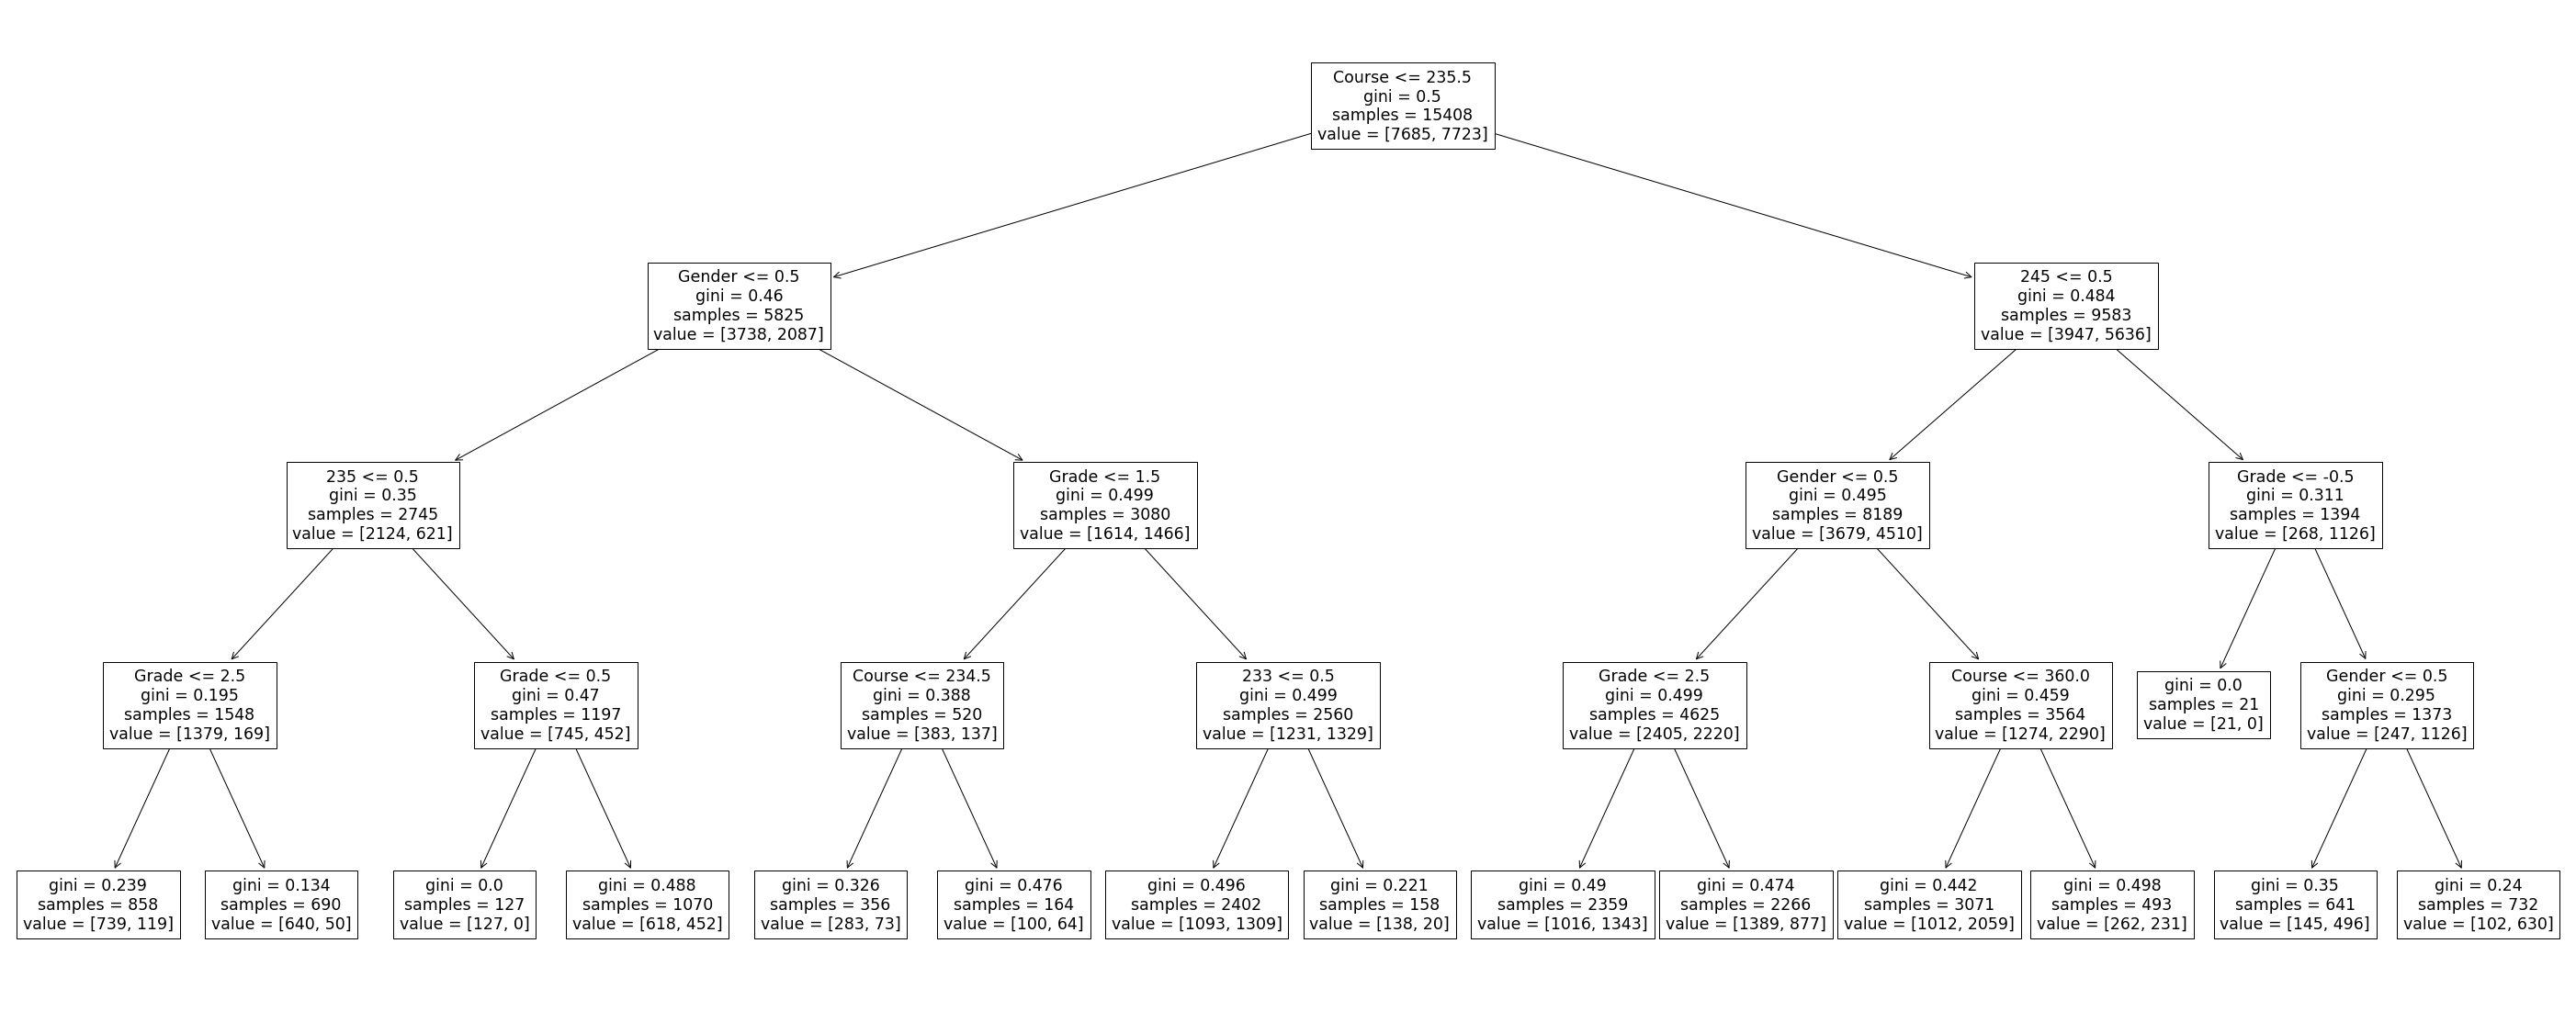

In [360]:
#
#  Examining a single tree for inference
#

from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier


## Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

rf = DecisionTreeClassifier(random_state=42, max_depth=4)
#rf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=10)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

score(predictions, y_test.values)
print()

## feature selection
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Print the tree
plt.figure(figsize=(50,20))
tree.plot_tree(rf, feature_names=list(X.columns.values))

#import graphviz 
#dot_data = tree.export_graphviz(rf[1], out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render() 

#r = export_text(rf, feature_names=list(X_train.columns.values))
#print(r)